In [1]:
import pandas as pd

data_folder = 'data/'
itens_file_name = 'valor_unitario_aprovado_sample.csv'

itens_file_path = data_folder + itens_file_name

dt = pd.read_csv(itens_file_path)
dt.head()

,Unnamed: 0,Item,ValorUnitarioAprovado,Data,idPRONAC
0,1894129,Material de consumo,7000.00,2014-07-31 07:27:29,179966
1,2003098,Locação de teatro,465.39,2015-05-05 16:38:24,185736
2,925488,Banheiro químico,250.00,2012-03-16 00:00:00,143223
3,1326505,Técnico de som,3500.00,2013-01-07 00:00:00,155368
4,136947,Cartaz,300.00,2010-01-01 00:00:00,114412


### Cleaning data

**Eliminating items with approved value equal to zero (0)**

There are some items with approved value equal to zero (0), for example the item with index **154** in the above table. For now they have no use, so lets get rid of them.

In [2]:
dt = dt[dt.ValorUnitarioAprovado != 0.0]
dt.head()

,Unnamed: 0,Item,ValorUnitarioAprovado,Data,idPRONAC
0,1894129,Material de consumo,7000.00,2014-07-31 07:27:29,179966
1,2003098,Locação de teatro,465.39,2015-05-05 16:38:24,185736
2,925488,Banheiro químico,250.00,2012-03-16 00:00:00,143223
3,1326505,Técnico de som,3500.00,2013-01-07 00:00:00,155368
4,136947,Cartaz,300.00,2010-01-01 00:00:00,114412


### Number of distinct items

In [3]:
print(len(dt['Item'].unique()))

1083


**Lots of distinct items**

There **1106** distinct items in that sample. It will be hard to plot them one by one, so it's a good idea to plot some sample of those items (the most frequent ones, for example).

**Getting the most frequent items**

In [4]:
top_frequent = dt['Item'].value_counts().head(10)
print(top_frequent.index)
display(top_frequent)

Index(['Transporte Local / Locação de Automóvel / Combustível',
       'Passagens Aéreas (Descrever os trechos na tela de deslocamentos)',
       'Assessor de imprensa', 'Refeição', 'Assistente de produção',
       'Produtor Executivo', 'Contador', 'Hospedagem sem Alimentação',
       'Cartaz',
       'Banner/faixa adesiva/faixa de lona/saia de palco/testeira/pórtico\r\n'],
      dtype='object')


Transporte Local / Locação de Automóvel / Combustível                    331
Passagens Aéreas (Descrever os trechos na tela de deslocamentos)         318
Assessor de imprensa                                                     308
Refeição                                                                 308
Assistente de produção                                                   283
Produtor Executivo                                                       267
Contador                                                                 249
Hospedagem sem Alimentação                                               240
Cartaz                                                                   225
Banner/faixa adesiva/faixa de lona/saia de palco/testeira/pórtico\r\n    220
Name: Item, dtype: int64

In [5]:
from utils.dates import Dates

date_column = 'Data'
price_column = 'ValorUnitarioAprovado'

Dates.get_xy(dt, date_column, price_column)

(array(['2014-07-31 07:27:29', '2015-05-05 16:38:24',
        '2012-03-16 00:00:00', ..., '2012-02-27 00:00:00',
        '2012-05-17 00:00:00', '2013-09-20 00:00:00'], dtype=object),
 array([7000.  ,  465.39,  250.  , ..., 1000.  ,  100.  , 1500.  ]))

Transporte Local / Locação de Automóvel / Combustível


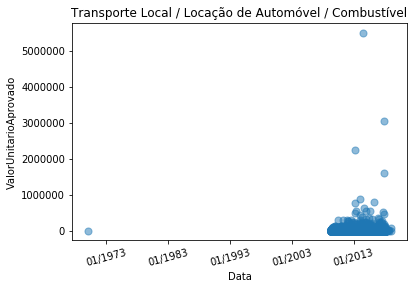

In [7]:
from utils.plotter import Plotter
import matplotlib.pyplot as plt
%matplotlib inline


frequent_item = top_frequent.index[0]
print(frequent_item)

x, y = Dates.get_xy_dates(dt, date_column, price_column)

Plotter.plot_scatter_along_time(x, y, x_label = date_column, y_label = price_column, title = frequent_item)
plt.show()